In [1]:
import pandas as pd

In [2]:
orders_df=pd.read_csv("/content/orders.csv")

In [3]:
users=pd.read_json("/content/users.json")

In [5]:
import sqlite3

# 1. Create a connection to an in-memory SQLite database
con = sqlite3.connect(':memory:')

# 2. Read and execute the SQL script from the file
with open('/content/restaurants.sql', 'r') as f:
    sql_script = f.read()
con.executescript(sql_script)

# 3. Load the data into a DataFrame (assuming the table is named 'restaurants')
rest_sql = pd.read_sql("SELECT * FROM restaurants", con)

In [9]:
orders_df


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian
...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian


In [7]:
users

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold
...,...,...,...,...
2995,2996,User_2996,Hyderabad,Gold
2996,2997,User_2997,Hyderabad,Regular
2997,2998,User_2998,Bangalore,Regular
2998,2999,User_2999,Pune,Regular


In [6]:
rest_sql

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8
...,...,...,...,...
495,496,Restaurant_496,Indian,3.1
496,497,Restaurant_497,Mexican,4.4
497,498,Restaurant_498,Chinese,3.9
498,499,Restaurant_499,Mexican,4.9


In [10]:
merged_df = orders_df.merge(users, on='user_id', how='left')
merged_df = merged_df.merge(rest_sql, on='restaurant_id', how='left')

print("Columns in merged DataFrame:", merged_df.columns.tolist())
display(merged_df.head())

Columns in merged DataFrame: ['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y', 'cuisine', 'rating']


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [11]:
merged_df

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0


In [12]:
merged_df.to_csv('final_food_delivery_dataset.csv', index=False)
print("Dataset successfully saved as final_food_delivery_dataset.csv")

Dataset successfully saved as final_food_delivery_dataset.csv


In [28]:
df1=pd.read_csv("/content/final_food_delivery_dataset.csv")

In [29]:
df1

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0


In [30]:
df1.shape

(10000, 12)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [32]:
df1.isna().sum()

,0
order_id,0
user_id,0
restaurant_id,0
order_date,0
total_amount,0
restaurant_name_x,0
name,0
city,0
membership,0
restaurant_name_y,0


In [33]:
df1.duplicated().sum()

np.int64(0)

In [34]:
df1.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [40]:
import pandas as pd

# Convert to datetime objects and keep them as that type
df1["order_date"] = pd.to_datetime(df1["order_date"], format="%d-%m-%Y")

In [43]:
df1['city']=df1['city'].astype('category')

In [44]:
df1['city'].value_counts()

,count
city,
Bangalore,2751
Chennai,2469
Pune,2430
Hyderabad,2350


In [46]:
df1['membership'].unique()

array(['Regular', 'Gold'], dtype=object)

In [47]:
df1['membership']=df1['membership'].astype('category')

In [49]:
df1['cuisine'].unique()

array(['Mexican', 'Indian', 'Chinese', 'Italian'], dtype=object)

In [50]:
df1['cuisine']=df1['cuisine'].astype('category')

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           10000 non-null  int64         
 1   user_id            10000 non-null  int64         
 2   restaurant_id      10000 non-null  int64         
 3   order_date         10000 non-null  datetime64[ns]
 4   total_amount       10000 non-null  float64       
 5   restaurant_name_x  10000 non-null  object        
 6   name               10000 non-null  object        
 7   city               10000 non-null  category      
 8   membership         10000 non-null  category      
 9   restaurant_name_y  10000 non-null  object        
 10  cuisine            10000 non-null  category      
 11  rating             10000 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 733.1+ KB


In [57]:
df1.groupby(['city','membership'])['total_amount'].sum().sort_values(ascending=False)

/tmp/ipython-input-2495362274.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(['city','membership'])['total_amount'].sum().sort_values(ascending=False)


,,total_amount
city,membership,
Bangalore,Regular,1212243.99
Chennai,Gold,1080909.79
Pune,Gold,1003012.32
Bangalore,Gold,994702.59
Hyderabad,Regular,992626.39
Pune,Regular,921785.61
Chennai,Regular,909603.24
Hyderabad,Gold,896740.19


## Summary:

### Q&A

**Which city generated the most revenue from Gold members?**
Chennai generated the highest total revenue from Gold members, with a total amount of \$1,080,909.79.

### Data Analysis Key Findings

*   **Top Revenue Generator**: Chennai led all cities in revenue from Gold members, surpassing the \$1 million mark with \$1,080,909.79.
*   **Gold Member Performance by City**: Following Chennai, the revenue distribution for Gold members was:
    *   **Pune**: \$1,003,012.32
    *   **Bangalore**: \$994,702.59
    *   **Hyderabad**: \$896,740.19
*   **Visual Comparison**: The grouped bar chart confirmed that while all cities contribute significantly, there is a visible hierarchy in the spending power or volume of Gold members across different geographical regions.

### Insights or Next Steps

*   **Replicate Success**: Investigate the marketing strategies or local partnerships in Chennai to understand why Gold membership revenue is higher there, and apply those findings to boost performance in Hyderabad.
*   **Average Order Value Analysis**: Conduct a follow-up analysis to determine if Chennai's lead is driven by a higher volume of transactions or a higher average order value (AOV) per Gold member compared to other cities.


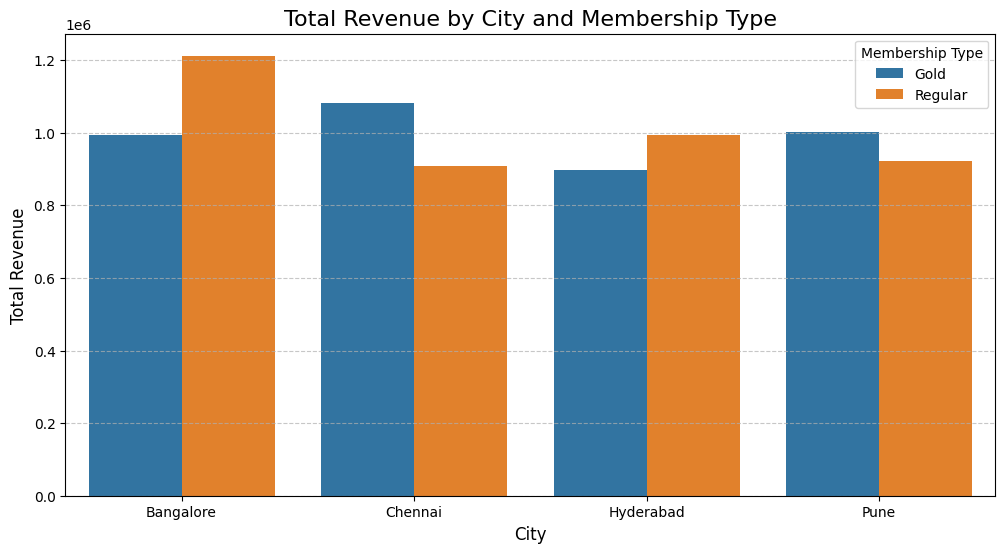

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group by city and membership and calculate total amount
revenue_by_city_membership = df1.groupby(['city', 'membership'], observed=False)['total_amount'].sum().reset_index()

# 2. Set the figure size for better readability
plt.figure(figsize=(12, 6))

# 3. Create the grouped bar chart
sns.barplot(data=revenue_by_city_membership, x='city', y='total_amount', hue='membership')

# 4. Add titles and labels
plt.title('Total Revenue by City and Membership Type', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Membership Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
A
# 5. Show the plot
plt.show()

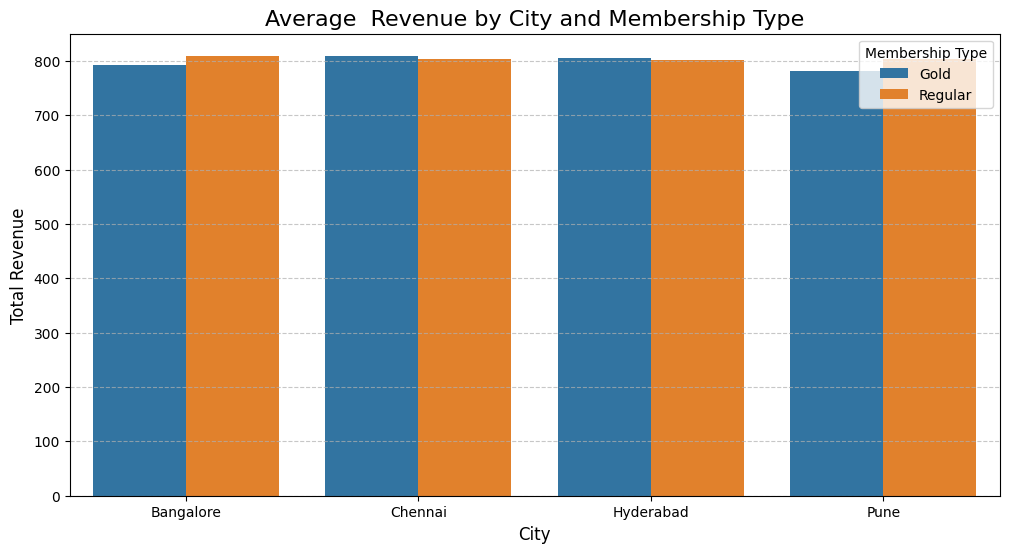

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group by city and membership and calculate total amount
revenue_by_city_membership = df1.groupby(['city', 'membership'], observed=False)['total_amount'].mean().reset_index()

# 2. Set the figure size for better readability
plt.figure(figsize=(12, 6))

# 3. Create the grouped bar chart
sns.barplot(data=revenue_by_city_membership, x='city', y='total_amount', hue='membership')

# 4. Add titles and labels
plt.title('Average  Revenue by City and Membership Type', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Membership Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Show the plot
plt.show()

In [69]:
revenue_by_city_membership = df1.groupby(['city', 'membership'], observed=False)['total_amount'].mean().sort_values(ascending=False)
revenue_by_city_membership

,,total_amount
city,membership,
Bangalore,Regular,809.782224
Chennai,Gold,808.459080
Hyderabad,Gold,806.421034
Pune,Regular,804.350445
Chennai,Regular,803.536431
Hyderabad,Regular,801.798376
Bangalore,Gold,793.223756
Pune,Gold,781.162243


In [58]:
#Which cuisine has the highest average order value across all orders?
avg_order_value_by_cuisine = df1.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)
print(avg_order_value_by_cuisine)

cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64


/tmp/ipython-input-554049520.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_order_value_by_cuisine = df1.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)


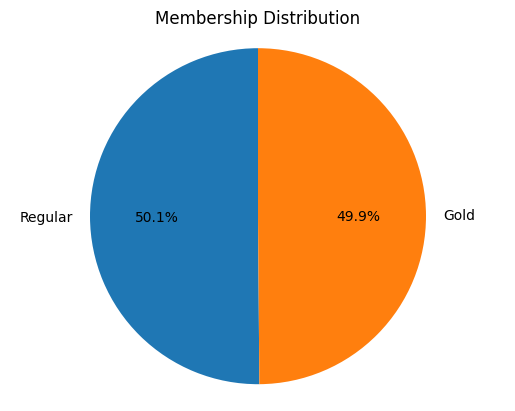

In [63]:
import matplotlib.pyplot as plt

counts = df1['membership'].value_counts()

plt.figure()
plt.pie(
    counts.values,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Membership Distribution")
plt.axis("equal")
plt.show()


In [70]:
combination_revenue=df1.groupby(['membership','cuisine'])['total_amount'].sum().sort_values(ascending=False)

/tmp/ipython-input-2667054811.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combination_revenue=df1.groupby(['membership','cuisine'])['total_amount'].sum().sort_values(ascending=False)


In [73]:
combination_revenue

membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [77]:
import pandas as pd

df1['rating_range'] = pd.cut(
    df1['rating'],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0],
    labels=['3.0–3.5', '3.6–4.0', '4.1–4.5', '4.6–5.0'],
    include_lowest=True
)

rating_revenue = (
    df1
    .groupby('rating_range')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

rating_revenue



In [80]:
#How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?
high_value_users = df1[df1['total_amount'] > 1000]['user_id'].nunique()
high_value_users

2080

In [91]:
restaurants = [
    "Grand Cafe Punjabi",
    "Grand Restaurant South Indian",
    "Ruchi Mess Multicuisine",
    "Ruchi Foods Chinese"
]

result = (
    df1[df1['restaurant_name_x'].isin(restaurants)]
    .groupby('restaurant_name_x')
    .agg(
        total_orders=('order_id', 'nunique'),
        avg_order_value=('total_amount', 'mean')
    )
    .query('total_orders < 20')
    .sort_values('avg_order_value', ascending=False)
)

result.head(1)


,total_orders,avg_order_value
restaurant_name_x,,
Ruchi Foods Chinese,19,686.603158


In [92]:
df1['quarter'] = df1['order_date'].dt.to_period('Q')


In [93]:
quarter_revenue = (
    df1
    .groupby('quarter')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

quarter_revenue


,total_amount
quarter,
2023Q3,2037385.10
2023Q4,2018263.66
2023Q1,1993425.14
2023Q2,1945348.72
2024Q1,17201.50


In [94]:
quarter_revenue.index = quarter_revenue.index.astype(str)
quarter_revenue


,total_amount
quarter,
2023Q3,2037385.10
2023Q4,2018263.66
2023Q1,1993425.14
2023Q2,1945348.72
2024Q1,17201.50


In [95]:
top_q = quarter_revenue.idxmax()
top_val = quarter_revenue.max()

print(f"Highest revenue quarter: {top_q} → {top_val}")


Highest revenue quarter: 2023Q3 → 2037385.1


In [96]:
# Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?
cuisine_stats = (
    df1
    .groupby('cuisine')
    .agg(
        distinct_restaurants=('restaurant_id', 'nunique'),
        total_revenue=('total_amount', 'sum')
    )
)
cuisine_stats_sorted = cuisine_stats.sort_values(
    by='distinct_restaurants',
    ascending=True
)


/tmp/ipython-input-1298010251.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('cuisine')


In [97]:
cuisine_stats_sorted

,distinct_restaurants,total_revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [98]:
#How many total orders were placed by users with Gold membership?
gold_users = df1[df1['membership'] == 'Gold']
total_orders_gold_users = gold_users['order_id'].nunique()
total_orders_gold_users

4987

In [101]:
df1

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating,rating_range,quarter
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2,3.0–3.5,2023Q1
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5,4.1–4.5,2023Q1
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0,3.6–4.0,2023Q3
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8,4.6–5.0,2023Q4
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0,3.0–3.5,2023Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,2023-05-21,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7,4.6–5.0,2023Q2
9996,9997,2867,267,2023-08-06,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2,4.1–4.5,2023Q3
9997,9998,522,420,2023-11-11,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0,3.6–4.0,2023Q4
9998,9999,319,492,2023-09-08,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0,3.6–4.0,2023Q3


In [102]:
#What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?
hyderabad_revenue = df1[df1['city'] == 'Hyderabad']['total_amount'].sum()
print(int(round(hyderabad_revenue)))

1889367


In [103]:
df1

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating,rating_range,quarter
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2,3.0–3.5,2023Q1
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5,4.1–4.5,2023Q1
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0,3.6–4.0,2023Q3
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8,4.6–5.0,2023Q4
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0,3.0–3.5,2023Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,2023-05-21,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7,4.6–5.0,2023Q2
9996,9997,2867,267,2023-08-06,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2,4.1–4.5,2023Q3
9997,9998,522,420,2023-11-11,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0,3.6–4.0,2023Q4
9998,9999,319,492,2023-09-08,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0,3.6–4.0,2023Q3


In [106]:
#What is the average order value (rounded to 2 decimals) for Gold members?
average_order_value_Gold=df1[df1['membership']=='Gold']['total_amount'].mean()
average_order_value_Gold

np.float64(797.1455564467616)

In [111]:
#How many orders were placed for restaurants with rating ≥ 4.5?
df1[df1['rating'] >= 4.5]['order_id'].nunique()


3374

In [114]:
#How many orders were placed in the top revenue city among Gold members only?
# Step 1: Find top revenue city among Gold members
top_revenue_city = (
    df1[df1['membership'] == 'Gold']
    .groupby('city')['total_amount']
    .sum()
    .idxmax()
)

top_revenue_city
order_count = (
    df1[
        (df1['membership'] == 'Gold') &
        (df1['city'] == top_revenue_city)
    ]
    .shape[0]
)

order_count


/tmp/ipython-input-4055658434.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('city')['total_amount']


1337

In [117]:
order_count

1337

In [118]:
# How many distinct users placed at least one order?
distinct_users = df1['user_id'].nunique()
distinct_users

2883